# DIGG forum rapport

* [#1482](https://github.com/salgo60/DIGG-skuggbacklog/issues/1482)
* Denna Notebook [1482 DIGG forum](https://github.com/salgo60/DIGG-skuggbacklog/blob/master/Notebook/1482_DIGG_forum.ipynb)
   * se även Notebook [1478 DIGG forum](https://github.com/salgo60/DIGG-skuggbacklog/blob/master/Notebook/1478%20DIGG%20forum.ipynb)



In [1]:
import time

from datetime import datetime

now = datetime.now()
timestamp = now.timestamp()

start_time = time.time()
print("Start:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Start: 2025-12-04 14:27:44


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

# 1. läs in
df = pd.read_json("forum_data.json")

# Kolla snabbt
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tid              4063 non-null   int64 
 1   cid              4063 non-null   int64 
 2   slug             4063 non-null   object
 3   topic_title      4063 non-null   object
 4   topic_timestamp  4063 non-null   object
 5   pid              4063 non-null   int64 
 6   post_index       4063 non-null   int64 
 7   post_timestamp   4063 non-null   object
 8   uid              4063 non-null   int64 
 9   content_html     4063 non-null   object
 10  content_len      4063 non-null   int64 
 11  post_date        4063 non-null   int64 
 12  username         3225 non-null   object
 13  username_norm    4063 non-null   object
 14  is_digg          4063 non-null   bool  
 15  post_month       4063 non-null   object
dtypes: bool(1), int64(7), object(8)
memory usage: 480.2+ KB


(    tid  cid                                               slug  \
 0   282   23  282/hjälp-nosad-och-dataportalens-communityfor...   
 1  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 2  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 3  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 4  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 
                                          topic_title  \
 0  Hjälp NOSAD och dataportalens communityforum a...   
 1  Dataportal.se har stöd för Sparql-queries, vis...   
 2  Dataportal.se har stöd för Sparql-queries, vis...   
 3  Dataportal.se har stöd för Sparql-queries, vis...   
 4  Dataportal.se har stöd för Sparql-queries, vis...   
 
             topic_timestamp   pid  post_index            post_timestamp   uid  \
 0  2022-01-11T17:30:39.030Z  1213           0  2022-01-11T17:30:39.030Z    62   
 1  2025-10-06T09:12:42.687Z  5304           0  2025-10-06T09:12:42.687Z   127   


In [4]:
df.head(3)



,tid,cid,slug,topic_title,topic_timestamp,pid,post_index,post_timestamp,uid,content_html,content_len,post_date,username,username_norm,is_digg,post_month
0,282,23,282/hjälp-nosad-och-dataportalens-communityfor...,Hjälp NOSAD och dataportalens communityforum a...,2022-01-11T17:30:39.030Z,1213,0,2022-01-11T17:30:39.030Z,62,"<p dir=""auto"">11 januari hade NOSAD (Network o...",5170,1641922239030,Maria_Dalhage,maria_dalhage,True,2022-01
1,1059,23,1059/dataportal-se-har-stöd-för-sparql-queries...,"Dataportal.se har stöd för Sparql-queries, vis...",2025-10-06T09:12:42.687Z,5304,0,2025-10-06T09:12:42.687Z,127,"<p dir=""auto"">Hej tänkte bara meddela att en f...",4756,1759741962687,tomasmonsen,tomasmonsen,False,2025-10
2,1059,23,1059/dataportal-se-har-stöd-för-sparql-queries...,"Dataportal.se har stöd för Sparql-queries, vis...",2025-10-06T09:12:42.687Z,5305,1,2025-10-06T10:06:41.301Z,1802,"<p dir=""auto"">Trevligt man kan undra varför de...",557,1759745201301,Magnus Sälgö,magnus sälgö,False,2025-10


In [5]:
df.isna().mean().sort_values(ascending=False)

username           0.206252
tid                0.000000
cid                0.000000
slug               0.000000
topic_title        0.000000
topic_timestamp    0.000000
pid                0.000000
post_index         0.000000
post_timestamp     0.000000
uid                0.000000
content_html       0.000000
content_len        0.000000
post_date          0.000000
username_norm      0.000000
is_digg            0.000000
post_month         0.000000
dtype: float64

In [6]:
df["post_time"] = pd.to_datetime(df["post_timestamp"], errors="coerce")
df = df.dropna(subset=["post_time"])

df["post_month"] = df["post_time"].dt.to_period("M")
df["post_year"]  = df["post_time"].dt.year


/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_10307/3339428106.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["post_month"] = df["post_time"].dt.to_period("M")


In [7]:
df["username_norm"] = (
    df["username"]
    .astype(str)
    .str.strip()
    .str.lower()
)

df["username_norm"].nunique()


200

<Axes: title={'center': 'Antal inlägg per månad – hela forumet'}, xlabel='post_month'>

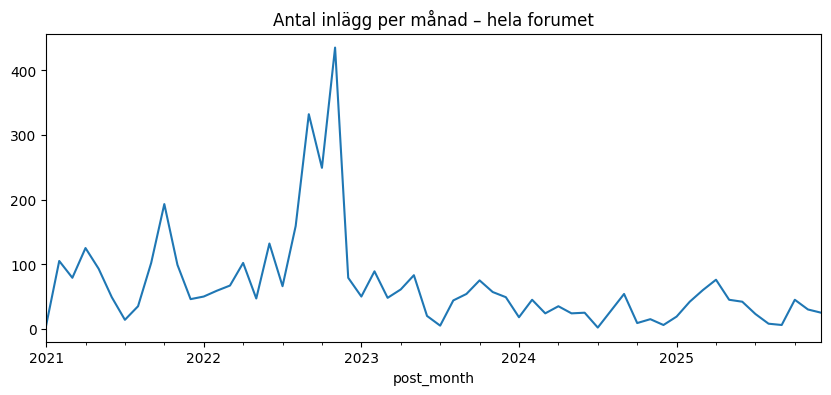

In [8]:
posts_over_time = df.groupby("post_month")["pid"].count()

posts_over_time.plot(
    title="Antal inlägg per månad – hela forumet",
    figsize=(10,4)
)


In [9]:
digg_users = [
    "digg_admin","josefinlassi","mkfsk","digitalist-ops","mikkeschiren",
    "fabian-von-tiedemann","fnordlander","tony","jenniferskoglund",
    "maria_dalhage","nina_berlin","kristine_","sven-erik"
]

digg_users_norm = {u.lower() for u in digg_users}
df["is_digg"] = df["username_norm"].isin(digg_users_norm)


In [10]:
df.groupby("is_digg")["pid"].count()


is_digg
False    3112
True      951
Name: pid, dtype: int64

In [11]:
df_digg = df[df["is_digg"]]

df_digg_no_maria = df_digg[
    df_digg["username_norm"] != "maria_dalhage"
]


In [12]:
df_digg.groupby("username_norm")["pid"].count().sort_values(ascending=False)


username_norm
maria_dalhage       440
nina_berlin         176
josefinlassi        131
kristine_           112
digg_admin           46
jenniferskoglund     29
mikkeschiren         10
sven-erik             7
Name: pid, dtype: int64

In [13]:
df_digg_no_maria.groupby("username_norm")["pid"].count().sort_values(ascending=False)


username_norm
nina_berlin         176
josefinlassi        131
kristine_           112
digg_admin           46
jenniferskoglund     29
mikkeschiren         10
sven-erik             7
Name: pid, dtype: int64

Text(0.5, 1.0, 'DIGG-aktivitet över tid')

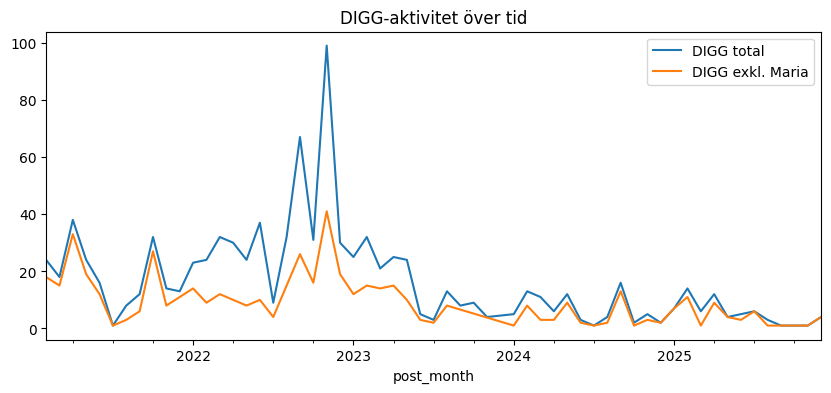

In [14]:
g1 = df_digg.groupby("post_month")["pid"].count()
g2 = df_digg_no_maria.groupby("post_month")["pid"].count()

ax = g1.plot(label="DIGG total", figsize=(10,4))
g2.plot(ax=ax, label="DIGG exkl. Maria")

ax.legend()
ax.set_title("DIGG-aktivitet över tid")


In [15]:
posts_per_topic = df.groupby("tid")["pid"].count() - 1
(posts_per_topic == 0).mean()


0.33775633293124246

In [17]:
# Vad diskuteras 
topics = {
    "Dataportalen": ["dataportal", "sveriges dataportal"],
    "Dataset (bad, grill, utegym)": ["badplats", "ute", "grill"],
    "EU / EDP": ["european data portal", "edp"],
    "Begrepp / metadata": ["begrepp", "termer", "metadat"],
    "Identifierare": ["identifier", "uri", "pid"]
}

def classify(text):
    t = text.lower()
    for k, words in topics.items():
        if any(w in t for w in words):
            return k
    return "Övrigt"

df["topic_class"] = df["content_html"].astype(str).apply(classify)


In [18]:
df["topic_class"].value_counts()

topic_class
Dataportalen                    2798
Övrigt                           987
Dataset (bad, grill, utegym)     147
Identifierare                     73
Begrepp / metadata                53
EU / EDP                           5
Name: count, dtype: int64

In [21]:
def classify_text(html):
    text = html.lower()
    if "dataportal" in text:
        return "Dataportal"
    if "badplats" in text or "bathing" in text:
        return "Badvatten"
    if "edp" in text or "european data portal" in text:
        return "EDP"
    return "Övrigt"

df["category"] = df["content_html"].fillna("").apply(classify_text)


In [23]:
#import traceback
#traceback.print_stack(limit=20)


In [25]:
#df.to_json("forum_enriched.json", orient="records", lines=True)


In [26]:
replies = df[df["post_index"] > 0]
starters = df[df["post_index"] == 0]

In [ ]:
def klass(text):
    t = str(text).lower()
    if "badplats" in t:
        return "badplatser"
    if "sparql" in t:
        return "sparql"
    if "termkatalog" in t:
        return "terminologi"
    return "övrigt"

df["category"] = df["content_html"].apply(klass)


In [30]:
# ==================================================
# Diagram-centrerad rapport – exporterar ALLA figurer
# ==================================================

import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pathlib import Path

# -------------------------
# 0. Setup
# -------------------------
OUTDIR = Path("figures")
OUTDIR.mkdir(exist_ok=True)

plt.rcParams.update({
    "figure.figsize": (10, 4),
    "axes.titlesize": 14,
    "axes.labelsize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

# -------------------------
# 1. Läs data
# -------------------------
#df = pd.read_json("forum_enriched.json", lines=True)

df["post_time"] = pd.to_datetime(df["post_timestamp"], errors="coerce")
df = df.dropna(subset=["post_time"])
df["post_month"] = df["post_time"].dt.strftime("%Y-%m")

df["username_norm"] = (
    df["username"].astype(str).str.strip().str.lower()
)

# -------------------------
# 2. DIGG-identifiering
# -------------------------
digg_users = [
    "digg_admin","josefinlassi","mkfsk","digitalist-ops","mikkeschiren",
    "fabian-von-tiedemann","fnordlander","tony","jenniferskoglund",
    "maria_dalhage","nina_berlin","kristine_","sven-erik"
]
df["is_digg"] = df["username_norm"].isin({u.lower() for u in digg_users})

df_digg = df[df["is_digg"]]
df_digg_no_maria = df_digg[df_digg["username_norm"] != "maria_dalhage"]

# -------------------------
# 3. Inlägg över tid – hela forumet
# -------------------------
posts_per_month = df.groupby("post_month")["pid"].count().sort_index()

posts_per_month.plot(marker="o")
plt.title("Antal inlägg per månad – hela forumet")
plt.xlabel("Månad")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(OUTDIR / "01_inlagg_over_tid_hela_forumet.png", dpi=200)
plt.close()

# -------------------------
# 4. Mest aktiva användare
# -------------------------
top_users = (
    df.groupby("username_norm")["pid"]
      .count()
      .sort_values(ascending=False)
      .head(15)
)

top_users.plot(kind="bar")
plt.title("Topp 15 mest aktiva användare")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.savefig(OUTDIR / "02_topp_15_anvandare.png", dpi=200)
plt.close()

# -------------------------
# 5. DIGG vs övriga – volym
# -------------------------
df.groupby("is_digg")["pid"].count().rename(
    index={False: "Övriga", True: "DIGG"}
).plot(kind="bar")

plt.title("Antal inlägg: DIGG vs övriga")
plt.ylabel("Antal inlägg")
plt.tight_layout()
plt.savefig(OUTDIR / "03_digg_vs_ovriga.png", dpi=200)
plt.close()

# -------------------------
# 6. DIGG över tid – med och utan Maria
# -------------------------
digg_all = df_digg.groupby("post_month")["pid"].count().sort_index()
digg_no_maria = df_digg_no_maria.groupby("post_month")["pid"].count().sort_index()

plt.plot(digg_all.index, digg_all.values, label="DIGG – alla")
plt.plot(digg_no_maria.index, digg_no_maria.values,
         label="DIGG – utan Maria", linestyle="--")

plt.title("DIGG:s aktivitet över tid")
plt.xlabel("Månad")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(OUTDIR / "04_digg_over_tid_med_utan_maria.png", dpi=200)
plt.close()

# -------------------------
# 7. Trådstarter vs svar
# -------------------------
topics_created = df[df["post_index"] == 0]
replies = df[df["post_index"] > 0]

pd.Series({
    "Trådstart": len(topics_created),
    "Svar": len(replies)
}).plot(kind="bar")

plt.title("Trådstarter vs svar – hela forumet")
plt.ylabel("Antal inlägg")
plt.tight_layout()
plt.savefig(OUTDIR / "05_tradstarter_vs_svar.png", dpi=200)
plt.close()

# -------------------------
# 8. DIGG: startar trådar eller svarar?
# -------------------------
digg_starters = df_digg[df_digg["post_index"] == 0]
digg_replies = df_digg[df_digg["post_index"] > 0]

pd.Series({
    "DIGG – startade trådar": len(digg_starters),
    "DIGG – svar": len(digg_replies)
}).plot(kind="bar")

plt.title("DIGG:s roll i diskussionerna")
plt.ylabel("Antal inlägg")
plt.tight_layout()
plt.savefig(OUTDIR / "06_digg_startar_vs_svarar.png", dpi=200)
plt.close()

# -------------------------
# 9. Enkel ämnesklassificering
# -------------------------
def html_to_text(html):
    if pd.isna(html):
        return ""
    return BeautifulSoup(str(html), "html.parser").get_text(
        separator=" ", strip=True
    ).lower()

df["content_text"] = df["content_html"].apply(html_to_text)

def classify(text):
    if "dataportal" in text:
        return "Dataportalen"
    if "badplats" in text:
        return "Badplatser"
    if "utegym" in text:
        return "Utegym"
    if "grill" in text:
        return "Grillplatser"
    if "european data portal" in text or "edp" in text:
        return "EU / EDP"
    if "term" in text or "begrepp" in text:
        return "Terminologi"
    return "Övrigt"

df["category"] = df["content_text"].apply(classify)

df["category"].value_counts().plot(kind="bar")
plt.title("Vad diskuteras i forumet?")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(OUTDIR / "07_amnesfordelning.png", dpi=200)
plt.close()

print("✅ Alla diagram exporterade till ./figures/")


✅ Alla diagram exporterade till ./figures/


In [6]:
 # End timer and calculate duration
end_time = time.time()
elapsed_time = end_time - start_time# Bygg audit-lager för den här etappen

# Print current date and total time
print("Date:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
minutes, seconds = divmod(elapsed_time, 60)
print("Total time elapsed: {:02.0f} minutes {:05.2f} seconds".format(minutes, seconds))


Date: 2025-12-04 14:03:51
Total time elapsed: 01 minutes 27.82 seconds
